In [3]:
import numpy as np
import pandas as pd

import os
dirname = "/Users/jhalakverma/Downloads/Indian-monuments/images"
ls = []

for root, dirs, filenames in os.walk(dirname):
    for filename in filenames:
        ls.append(os.path.join(root, filename))

if not ls:  
    print("No files found in the directory:", dirname)
else:
    print("First file:", ls[0])  

import cv2
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

First file: /Users/jhalakverma/Downloads/Indian-monuments/images/.DS_Store


/Users/jhalakverma/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
path = "/Users/jhalakverma/Downloads/Indian-monuments/images"
for dirpath, dirnames, filenames in os.walk(path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in '/Users/jhalakverma/Downloads/Indian-monuments/images'.
There are 24 directories and 1 images in '/Users/jhalakverma/Downloads/Indian-monuments/images/test'.
There are 0 directories and 46 images in '/Users/jhalakverma/Downloads/Indian-monuments/images/test/jamali_kamali_tomb'.
There are 0 directories and 40 images in '/Users/jhalakverma/Downloads/Indian-monuments/images/test/charminar'.
There are 0 directories and 31 images in '/Users/jhalakverma/Downloads/Indian-monuments/images/test/Ajanta Caves'.
There are 0 directories and 45 images in '/Users/jhalakverma/Downloads/Indian-monuments/images/test/tanjavur temple'.
There are 0 directories and 65 images in '/Users/jhalakverma/Downloads/Indian-monuments/images/test/golden temple'.
There are 0 directories and 30 images in '/Users/jhalakverma/Downloads/Indian-monuments/images/test/Humayun_s Tomb'.
There are 0 directories and 40 images in '/Users/jhalakverma/Downloads/Indian-monuments/images/test/Sun

In [5]:
train_dir =  path + "/train/"
test_dir = path + "/test/"
train_dir

'/Users/jhalakverma/Downloads/Indian-monuments/images/train/'

In [6]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['Ajanta Caves', 'Charar-E- Sharif', 'Chhota_Imambara',
       'Ellora Caves', 'Fatehpur Sikri', 'Gateway of India',
       'Humayun_s Tomb', 'India gate pics', 'Khajuraho',
       'Sun Temple Konark', 'alai_darwaza', 'alai_minar',
       'basilica_of_bom_jesus', 'charminar', 'golden temple',
       'hawa mahal pics', 'iron_pillar', 'jamali_kamali_tomb',
       'lotus_temple', 'mysore_palace', 'qutub_minar', 'tajmahal',
       'tanjavur temple', 'victoria memorial'], dtype='<U21')

In [7]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir  + target_class
    

    random_image = random.sample(os.listdir(target_folder), 1)


    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))


  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

Image shape: (226, 223, 3)


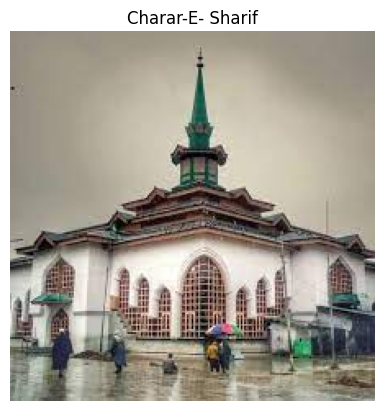

In [8]:
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names)) 

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(300, 300),
                                               batch_size=32,
                                               class_mode='categorical') 

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(300, 300),
                                              batch_size=32,
                                              class_mode='categorical')

Found 3666 images belonging to 24 classes.
Found 1049 images belonging to 24 classes.


In [10]:
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(300, 300, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(24, activation='softmax')
])

/Users/jhalakverma/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=50,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))


/Users/jhalakverma/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.1289 - loss: 3.4325 - val_accuracy: 0.3108 - val_loss: 2.8988
Epoch 2/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.6312 - loss: 1.3834 - val_accuracy: 0.3804 - val_loss: 3.1852
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9001 - loss: 0.4615 - val_accuracy: 0.4261 - val_loss: 3.9192
Epoch 4/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.9857 - loss: 0.1253 - val_accuracy: 0.4271 - val_loss: 4.7115
Epoch 5/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.9972 - loss: 0.0396 - val_accuracy: 0.4204 - val_loss: 5.0666
Epoch 6/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9964 - loss: 0.0480 - val_accuracy: 0.4242 - val_loss: 5.5179
Epoch 7/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9993 - loss: 0.0133 - val_accuracy: 0.3994 - val_loss: 5.7738
Epoch 8/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.9993 - loss: 0.0180 - val_accu

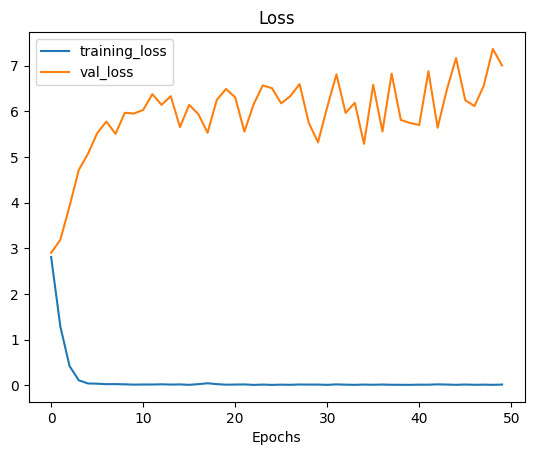

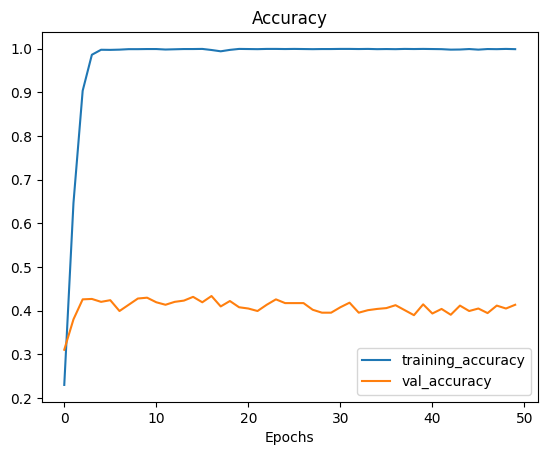

In [12]:
plot_loss_curves(history_10)

In [13]:
def load_and_prep_image(filename, img_shape=300):
  
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
    
  return img

def pred_and_plot(model, filename, class_names):

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[pred.argmax()] 
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] 

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


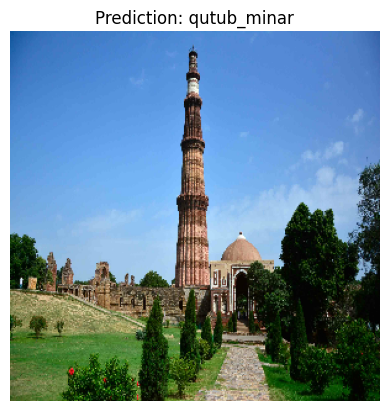

In [14]:
pred_and_plot(model_10, "/Users/jhalakverma/Downloads/Indian-monuments/images/test/qutub_minar/img9.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


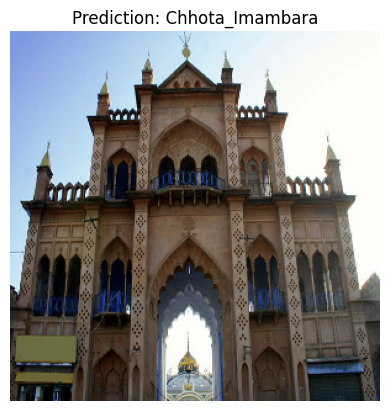

In [15]:
pred_and_plot(model_10, "/Users/jhalakverma/Downloads/Indian-monuments/images/test/Chhota_Imambara/8 - Copy.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


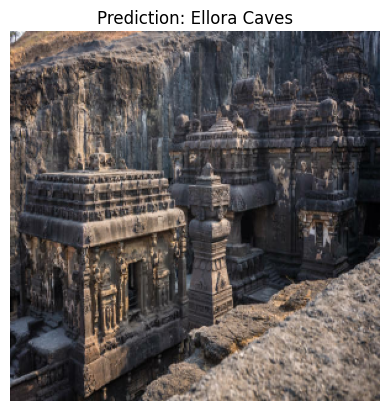

In [16]:
pred_and_plot(model_10, "/Users/jhalakverma/Downloads/Indian-monuments/images/test/Ellora Caves/5.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


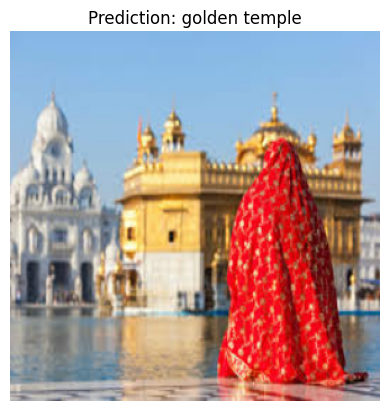

In [17]:
pred_and_plot(model_10, "/Users/jhalakverma/Downloads/Indian-monuments/images/test/golden temple/14.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


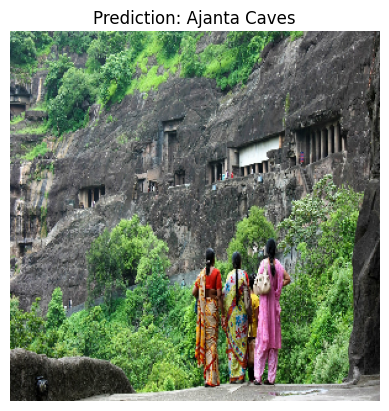

In [18]:
pred_and_plot(model_10, "/Users/jhalakverma/Downloads/Indian-monuments/images/test/Ajanta Caves/7.jpg", class_names)

In [19]:
model_10.save('trained_model.h5')

Model saved as a zip: /Users/jhalakverma/Desktop/Monument.zip
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 815ms/step


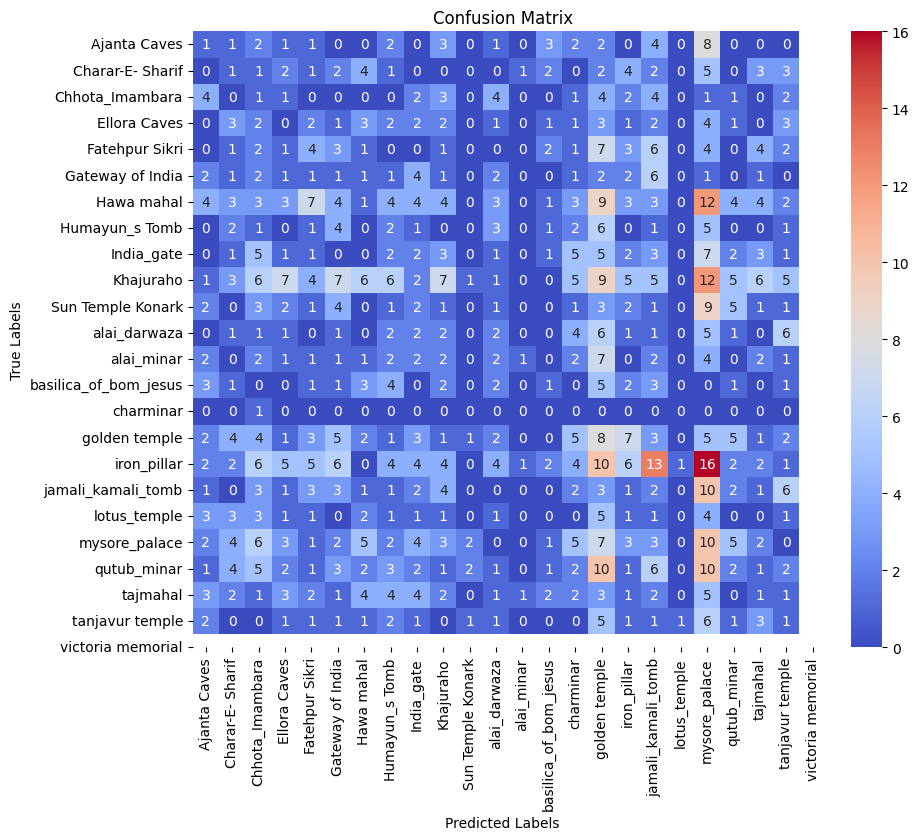

In [20]:
import zipfile
import os

directory = "/Users/jhalakverma/Desktop/Monument"


zip_file_name = "/Users/jhalakverma/Desktop/Monument.zip"


with zipfile.ZipFile(zip_file_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(directory):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), directory))

print("Model saved as a zip:", zip_file_name)


predictions = model_10.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

class_labels = list(test_data.class_indices.keys())

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

33/33 ━━━━━━━━━━━━━━━━━━━━ 30s 884ms/step


/Users/jhalakverma/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


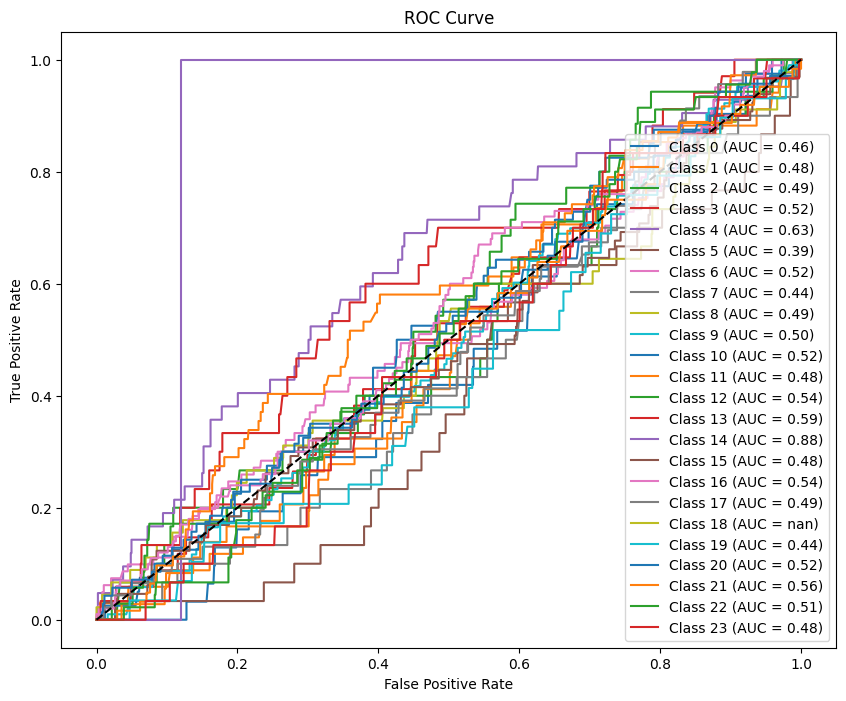

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

y_true = test_data.classes 
y_pred_probs = model_10.predict(test_data)

y_true_onehot = to_categorical(y_true, num_classes=len(test_data.class_indices))

plt.figure(figsize=(10, 8))
for i in range(len(test_data.class_indices)):
    fpr, tpr, _ = roc_curve(y_true_onehot[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()